In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("tic-tac-toe.csv")
data

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,False
954,o,x,o,x,x,o,x,o,x,False
955,o,x,o,x,o,x,x,o,x,False
956,o,x,o,o,x,x,x,o,x,False


In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


categorical_columns = data.columns  

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])


data = data.astype(float)


print("\nConverted Dataset:")
print(data.head())



Converted Dataset:
    TL   TM   TR   ML   MM   MR   BL   BM   BR  class
0  2.0  2.0  2.0  2.0  1.0  1.0  2.0  1.0  1.0    1.0
1  2.0  2.0  2.0  2.0  1.0  1.0  1.0  2.0  1.0    1.0
2  2.0  2.0  2.0  2.0  1.0  1.0  1.0  1.0  2.0    1.0
3  2.0  2.0  2.0  2.0  1.0  1.0  1.0  0.0  0.0    1.0
4  2.0  2.0  2.0  2.0  1.0  1.0  0.0  1.0  0.0    1.0


In [4]:
X = data.drop(columns=['TL', 'class'])

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42) 
data['Cluster'] = kmeans.fit_predict(X_scaled)

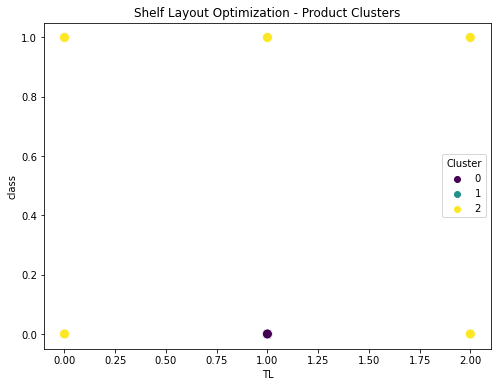

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='TL', y='class', hue='Cluster', palette='viridis', s=100)
plt.title("Shelf Layout Optimization - Product Clusters")
plt.xlabel('TL')
plt.ylabel('class')
plt.legend(title='Cluster')
plt.show()

In [10]:
print(data[['TL', 'class', 'Cluster']])

      TL  class  Cluster
0    2.0    1.0        0
1    2.0    1.0        1
2    2.0    1.0        1
3    2.0    1.0        0
4    2.0    1.0        1
..   ...    ...      ...
953  1.0    0.0        1
954  1.0    0.0        0
955  1.0    0.0        0
956  1.0    0.0        1
957  1.0    0.0        0

[958 rows x 3 columns]


In [11]:
cluster_centers = kmeans.cluster_centers_
print("\nCluster Centers (Normalized Features):")
print(cluster_centers)


Cluster Centers (Normalized Features):
[[-0.34065514 -0.23945268  1.02127859 -0.04240907  0.17581843  0.1176798
  -0.22745545 -0.28318318]
 [ 1.00882749  0.14057518 -0.46040294 -0.01781562 -0.23963775 -0.24369502
   0.19047375 -0.28682739]
 [-0.76840845  0.14006187 -0.76385474  0.07590601  0.06036762  0.14006187
   0.06492133  0.70768385]]
